<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jeong-wooseok/Python/blob/master/5_Developement/STOCK/1.%20ETF_KR_Jupyter.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

### 0. 기본설정

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: packaging>=20.0 in c:\dev\miniconda\lib\site-packages (from matplotlib) (20.8)



In [7]:
# colab에서 싷행할 경우
!pip install -U selenium bs4 requests finance-datareader

# 데이터 다운로드
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jeong-wooseok/Python/master/"
ETF_PATH = os.path.join("5_Developement", "STOCK")
ETF_URL = DOWNLOAD_ROOT + "5_Developement/STOCK/ETF.tgz"

def fetch_ETF_data(ETF_url=ETF_URL, ETF_path=ETF_PATH):
    if not os.path.isdir(ETF_PATH):
        os.makedirs(ETF_path)
    tgz_path = os.path.join(ETF_path, "ETF.tgz")
    urllib.request.urlretrieve(ETF_url, tgz_path)
    ETF_tgz = tarfile.open(tgz_path)
    ETF_tgz.extractall(path=ETF_path)
    ETF_tgz.close()
fetch_ETF_data()

# 파일 저장 폴더생성
import os
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "ETF_KR"
SAMPLES_PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
os.makedirs(SAMPLES_PATH, exist_ok=True)


In [11]:
#파일 경로 생성함수
def mkfile(file):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "ETF_KR"
    PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
    file_o = os.path.join(SAMPLES_PATH,f'{file}.xlsx')
    return file_o

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "ETF_KR"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "ETF_KR"
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 결측치제거 및 scaling
def scale(df):
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd
    df = df.fillna(method='pad').dropna(axis=0)
    scaler = MinMaxScaler()
    scaler.fit(df)
    output = scaler.transform(df)
    output = pd.DataFrame(output, columns=df.columns, index=df.index.values)
    return output
    
# 시각화
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


sys_font=fm.findSystemFonts()
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# fm._rebuild()

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

# font_name = fm.FontProperties(fname=path, size=50).get_name()
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family=font_name)

# plt.rcParams["axes.grid"] = True
# plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams["axes.formatter.limits"] = -10000, 10000
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)



In [12]:

# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 가격 및 차트 함수 설정
# 한 plot 내에 다수 차트 생성 
def price_plot(codes,period):
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    for code in codes:
        df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
        df['코드'] = df['코드'].astype(str)
        temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
        df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=(16,8))
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_kospi['p_index'].plot(color = 'grey',legend = 'a',label= 'KOSPI지수', figsize=(16,8))
        
# 다중 차트 만드는 함수  
def price_plot_s(codes,period,row,col, fig = (16,8)):
    import pandas as pd
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    import matplotlib.pyplot as plt
    for idx, code in enumerate(codes):
        df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
        df['코드'] = df['코드'].astype(str)
        temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
        df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
                
        plt.subplot(row,col,idx+1) # subplot : 도화지를 나눔, 1행/2열로 나누고 첫번째도화지에...
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=fig)
        df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
        df_kospi['p_index'].plot(color = 'grey', legend = 'a',label= 'KOSPI지수', figsize=fig)

# 코드 리스트로 df 불러오기
def price_codes(codes, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)

    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 
    
    return df_m, df_m_index  
        
# 특정텍스트 포함 조건식을 걸어서 가격 df를 만드는 함수
def price_texts(유형,종목명, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    if 유형 != 'None':
        codes = [code for code in df[df.유형.str.contains(유형)].코드]
        names = [n for n in df[df.유형.str.contains(유형)].종목명]
    elif 종목명 != 'None':
        codes = [code for code in df[df.종목명.str.contains(종목명)].코드]
        names = [n for n in df[df.종목명.str.contains(종목명)].종목명]
    print(f'해당종목은 {names}입니다.')
    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
        
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 

    return df_m, df_m_index

# 구성종목 확인함수
def comp(codes):
    import requests
    import FinanceDataReader as fdr
    import pandas as pd
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    df_l = []
    try:
        for idx, code in enumerate(codes):
            name = df[df.코드 == code].종목명.values[0]
            url = f'https://finance.naver.com/item/main.nhn?code={code}'
            html = requests.get(url).text
            dfs = pd.read_html(html)
            dfs_c = dfs[3]
            if len(dfs_c)>10 :
                if dfs_c['구성비중'][2]!='-':
                    dfs_c = dfs_c.dropna()[['구성종목(구성자산)','구성비중','등락률']]
                    dfs_c.columns = [name,f'구성비중{idx+1}',f'등락률{idx+1}']
                    df_l.append(dfs_c)
        df_m = pd.concat(df_l,axis=1)
    except:
        pass    
        df_m = pd.concat(df_l,axis=1)
    return df_m

# 구성종목2 확인함수(미국주식 등)
def comp_e(codes):
    import requests
    import FinanceDataReader as fdr
    import pandas as pd
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    df_l = []
    try:
        for idx, code in enumerate(codes):
            name = df[df.코드 == code].종목명.values[0]
            url = f'https://finance.naver.com/item/main.nhn?code={code}'
            html = requests.get(url).text
            dfs = pd.read_html(html)
            dfs_c = dfs[3]
            if len(dfs_c)>10 :
                dfs_c = dfs_c.dropna()[['구성종목(구성자산)','주식수(계약수)']]
                dfs_c.columns = [name,f'주식수{idx+1}']
                df_l.append(dfs_c)
        df_m = pd.concat(df_l,axis=1)
    except:
        pass    
        df_m = pd.concat(df_l,axis=1)
    return df_m

### 1. 거래중인 ETF 리스트 확보 <br>
현재 시장에 거래중인 ETF 항목을 끌어온 후, 전처리, csv에 저장하였습니다.<br>
[리스트출처 : 증권예탁원 증권정보포털](https://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/etf/BIP_CNTS06025V.xml&menuNo=174)

In [14]:
# df0생성
import pandas as pd
etf = mkfile('etf') 

df0 = pd.DataFrame()
cols = ['종목명','코드','유형','순자산','종가','거래량','3개월수익율','총보수','운용사']
lines = [1,2,3,4,5,6,9,15,16]
with open('./ETF.txt','r',encoding='EUCKR') as f:
    data = f.readlines()
    
    for idx in range(len(cols)):
        df0[cols[idx]] = [j.replace('\n','') for i, j in enumerate(data) if i % 17 == lines[idx]]
    
# 전처리 : 보수, 수익율 없는 상품 제거
df0 = df0.drop(df0[df0['총보수']==''].index)
df0 = df0.drop(df0[df0['3개월수익율']==''].index)

# 전처리 : 계산 가능타입으로 변환
for j in cols[3:6]:
    df0[j] = df0[j].apply(lambda x: x.replace(',',''))
    df0[j] = df0[j].astype(int)
for j in cols[6:8]:
    df0[j] = df0[j].astype(float)

df0.to_csv(etf,sep=',',encoding='euc-kr')

print(f'추출한 총 ETF의 수 {len(df0)}개')

추출한 총 ETF의 수 458개


#### ETF : 3개월 수익율 순위
최근 수익율 기준으로 확인합니다.

In [15]:
df0.sort_values('3개월수익율',ascending =False)[:20]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사
109,TIGER 200IT레버리지,243880,파생상품/레버리지,565,75025,26712,126.80,0.69,미래에셋자산운용
236,TIGER 200에너지화학레버리지,243890,파생상품/레버리지,155,23965,40773,111.15,0.69,미래에셋자산운용
107,HANARO 200선물레버리지,304780,파생상품/레버리지,593,31130,15232,88.38,0.45,엔에이치아문디자산운용
255,KINDEX 레버리지,152500,파생상품/레버리지,135,11250,117294,87.66,0.30,한국투자신탁운용
262,ARIRANG 200선물레버리지,253150,파생상품/레버리지,129,51510,11387,87.58,0.06,한화자산운용
141,KBSTAR 200선물레버리지,252400,파생상품/레버리지,365,26000,72301,87.52,0.60,케이비자산운용
168,TIGER 레버리지,123320,파생상품/레버리지,270,26900,887302,87.46,0.09,미래에셋자산운용
3,KODEX 레버리지,122630,파생상품/레버리지,18459,28505,62176775,87.04,0.64,삼성자산운용
65,TIGER 200선물레버리지,267770,파생상품/레버리지,1288,21400,3293961,86.98,0.09,미래에셋자산운용
160,KOSEF 200선물레버리지,253250,파생상품/레버리지,283,25610,26802,86.93,0.46,키움투자자산운용


### 2. 파생상품 제외한 목록 만들기 (연금계좌 활용)

#### 연금용 ETF : 3개월 수익율 순위

In [4]:
a = '파생상품'
df1_0 = df0[~df0['유형'].str.contains(a)]
# print(df['유형'].unique())
# print()
# print(df1['유형'].unique())

# etf_연금 = mkfile('etf_연금') 
# df1.to_csv(etf_연금,sep=',',encoding='euc-kr')
df1_0.sort_values('3개월수익율',ascending =False)[:20]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사
22,TIGER KRX2차전지K-뉴딜,364980,테마/기타,5732,17115,1201431,66.00,0.40,미래에셋자산운용
16,KODEX 2차전지산업,305720,테마/기타,7633,19320,2791699,64.43,0.45,삼성자산운용
23,TIGER 2차전지테마,305540,테마/기타,5300,17365,1606653,52.86,0.50,미래에셋자산운용
242,KODEX 200IT TR,363580,섹터/IT,152,15240,5362,52.40,0.15,삼성자산운용
264,KBSTAR 200IT,285000,섹터/IT,127,18130,6668,51.46,0.19,케이비자산운용
24,TIGER 200 IT,139260,섹터/IT,5149,40595,687421,51.36,0.40,미래에셋자산운용
99,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,646,3050,669362,51.36,0.25,케이비자산운용
115,TIGER 현대차그룹+펀더멘털,138540,그룹주/현대차,508,26490,83705,46.43,0.15,미래에셋자산운용
54,KODEX 자동차,091180,섹터/경기소비재,1694,23355,459387,46.24,0.45,삼성자산운용
143,TIGER 200 에너지화학,139250,섹터/소재,356,21215,69469,45.61,0.40,미래에셋자산운용


### 3. 금일 ETF 수익율 순위 확인
금일 거래된 일수익율 기준의 ETF리스트를 확보합니다.

In [5]:
import requests
import json
from pandas import json_normalize
url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df2 = json_normalize(json_data['result']['etfItemList'])
df2.sort_values('changeRate',ascending=False)[:10]
df2.columns = ['코드','TabCode','종목명','현재가','등/락','가격변동','일수익율','일평균가','3개월수익율','거래량/일','거래금액/일,백만','marketSum']
df2 = df2.fillna(0)
df2['3개월수익율'] = df2['3개월수익율'].round(1)

df = pd.merge(df0,df2[['코드','가격변동','일수익율','거래금액/일,백만']], on ='코드') # 기존 df에 필수정보 포함
df1 = pd.merge(df1_0,df2[['코드','가격변동','일수익율','거래금액/일,백만']], on ='코드') # 기존 df1(연금 용 목록)에 필수정보 포함
df.sort_values('일수익율',ascending=False)[:20]
# df.to_excel('etf_list.xlsx',header=True,index=False);

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
229,ARIRANG 200선물인버스2X,253160,파생상품/인버스,153,4085,198417,-49.19,0.06,한화자산운용,180,4.41,888
2,KODEX 200선물인버스2X,252670,파생상품/인버스,19185,2045,235039411,-49.26,0.64,삼성자산운용,90,4.40,1125809
157,KBSTAR 200선물인버스2X,252420,파생상품/인버스,272,2050,693827,-49.13,0.60,케이비자산운용,90,4.39,2839
76,TIGER 200선물인버스2X,252710,파생상품/인버스,1063,2120,5560554,-49.10,0.09,미래에셋자산운용,90,4.25,69949
348,KOSEF 200선물인버스2X,253230,파생상품/인버스,73,2035,147889,-49.13,0.46,키움투자자산운용,85,4.18,863
337,KODEX 미국S&P바이오(합성),185680,해외지수/해외지수,80,35320,3026,16.34,0.25,삼성자산운용,920,2.60,150
415,ARIRANG 코스닥150선물인버스,301410,파생상품/인버스,45,6960,33300,-17.09,0.29,한화자산운용,180,2.59,230
184,TIGER 여행레저,228800,섹터/경기소비재,207,4670,214841,18.98,0.50,미래에셋자산운용,115,2.46,3561
95,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,646,3050,669362,51.36,0.25,케이비자산운용,75,2.46,2444
12,KODEX 인버스,114800,파생상품/인버스,11091,3850,51219584,-28.44,0.64,삼성자산운용,90,2.34,480213


그림 저장: Daily_유형별ETF수익율_21Jan15


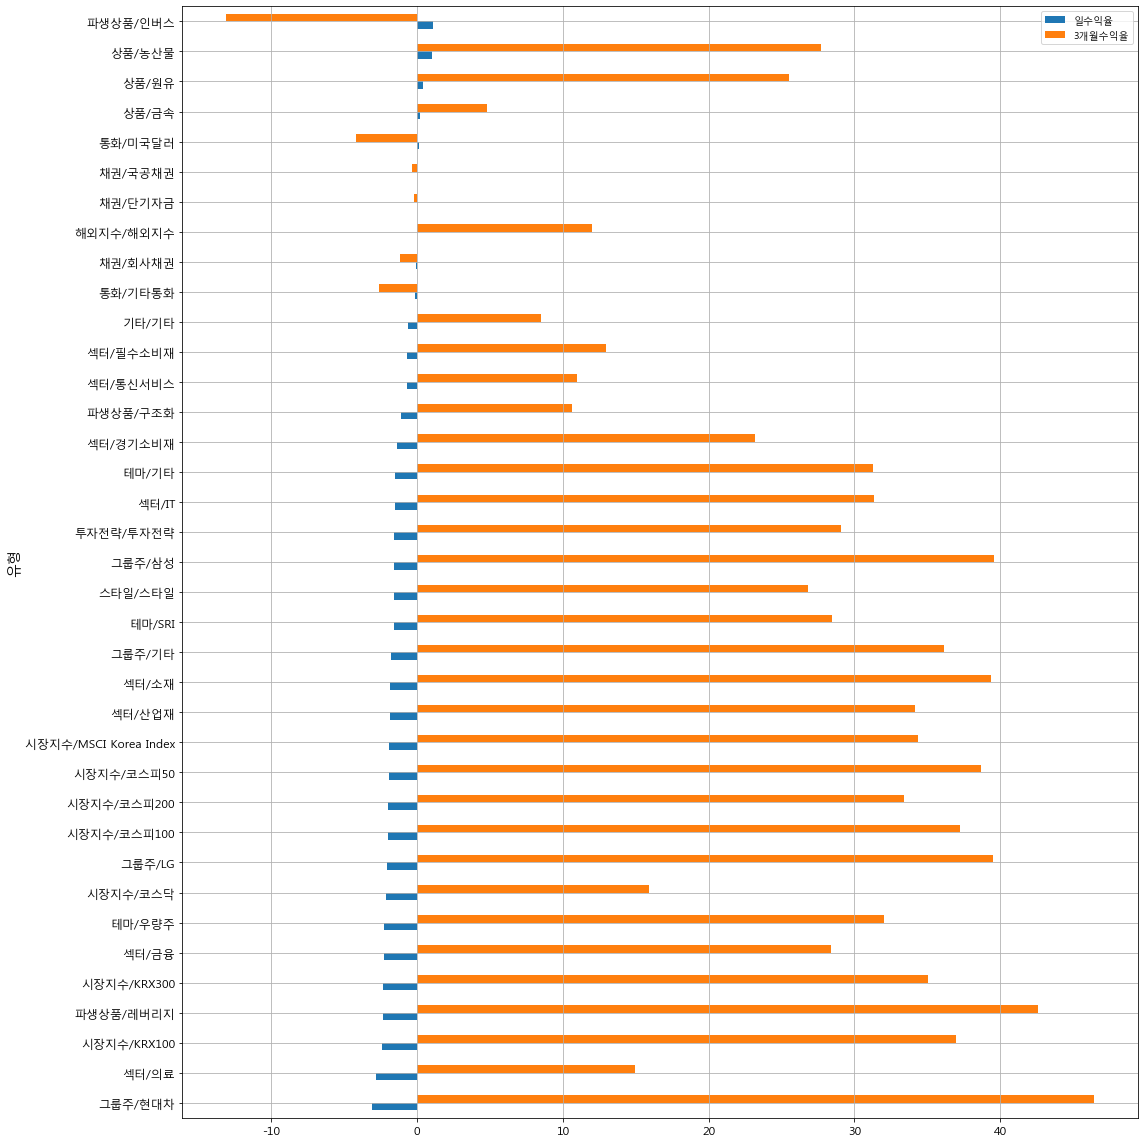

In [9]:
# 유형 별 수익율 순위 한눈에 보기
df.groupby(df['유형'])[['일수익율','3개월수익율']].mean().sort_values(by ='일수익율',ascending=True).plot.barh(figsize=(16,16))
from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"Daily_유형별ETF수익율_{file_name}")

#### 유형, 종목명 등 조회
유형, 종목명 등 텍스트를 넣어서 조회 가능합니다.

In [10]:
df[df.종목명.str.contains('골드')]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
40,KODEX 골드선물(H),132030,상품/금속,2475,12600,359330,-3.71,0.68,삼성자산운용,60,0.48,2693
152,KINDEX 골드선물 레버리지(합성 H),225130,파생상품/레버리지,282,18430,41621,-8.51,0.49,한국투자신탁운용,100,0.54,617
178,TIGER 골드선물(H),319640,상품/금속,216,13420,25406,-3.59,0.39,미래에셋자산운용,60,0.45,247
448,KODEX 골드선물인버스(H),280940,파생상품/인버스,35,7085,5639,1.72,0.45,삼성자산운용,-5,-0.07,16


In [12]:
#상품 종류만 추려서 보기
df[(df.유형.str.contains('상품')) & (~df.유형.str.contains('파생상품'))] 

,종목명,코드,유형,순자산,종가,거래량,수익율,총보수,운용사
30,KODEX WTI원유선물(H),261220,상품/원유,4241,7690,2608820,23.73,0.35,삼성자산운용
40,KODEX 골드선물(H),132030,상품/금속,2465,13090,331722,0.42,0.68,삼성자산운용
62,KODEX 은선물(H),144600,상품/금속,1394,5635,1074015,12.03,0.68,삼성자산운용
73,TIGER 원유선물Enhanced(H),130680,상품/원유,1097,2310,1349300,17.56,0.70,미래에셋자산운용
116,TIGER 농산물선물Enhanced(H),137610,상품/농산물,466,5460,85337,17.93,0.70,미래에셋자산운용
200,TIGER 골드선물(H),319640,상품/금속,195,13915,19632,0.32,0.39,미래에셋자산운용
228,KODEX 구리선물(H),138910,상품/금속,158,6910,35933,21.87,0.68,삼성자산운용
245,KODEX 3대농산물선물(H),271060,상품/농산물,141,9710,26411,20.02,0.55,삼성자산운용
308,TIGER 구리실물,160580,상품/금속,100,8230,5535,14.15,0.85,미래에셋자산운용
329,KODEX 콩선물(H),138920,상품/농산물,90,11265,11858,27.72,0.68,삼성자산운용


### 4. 차트 분석

그림 저장: ['271060', '219390']


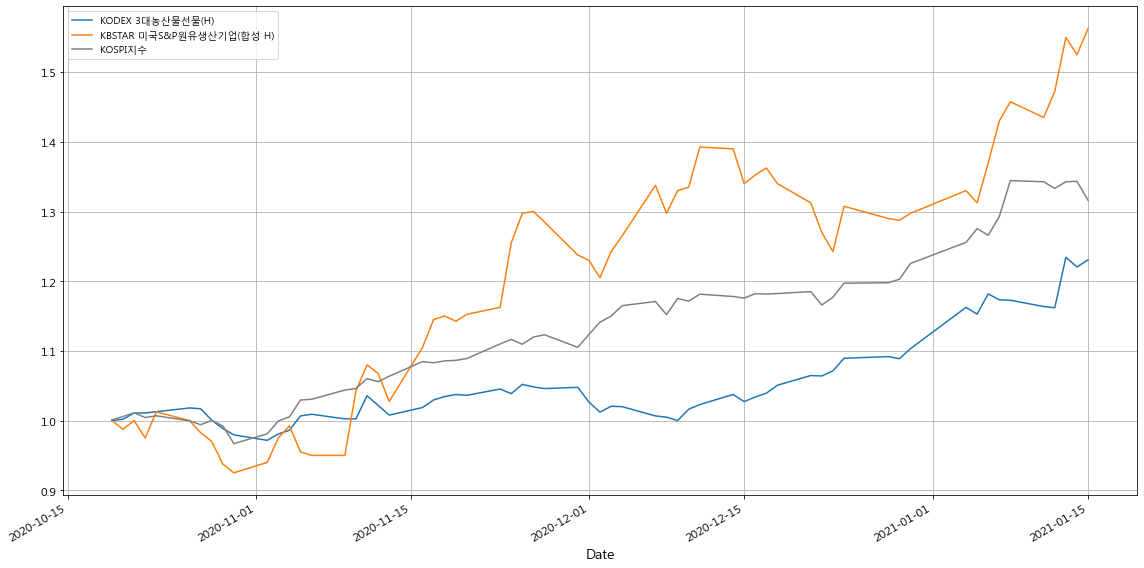

In [51]:
codes =['271060','219390']
price_plot(codes,90)
save_fig(f"{codes}")

#### 금일 상위 20개 종목 30일 차트 조회

그림 저장: Daily_Top20ETF_21Jan15


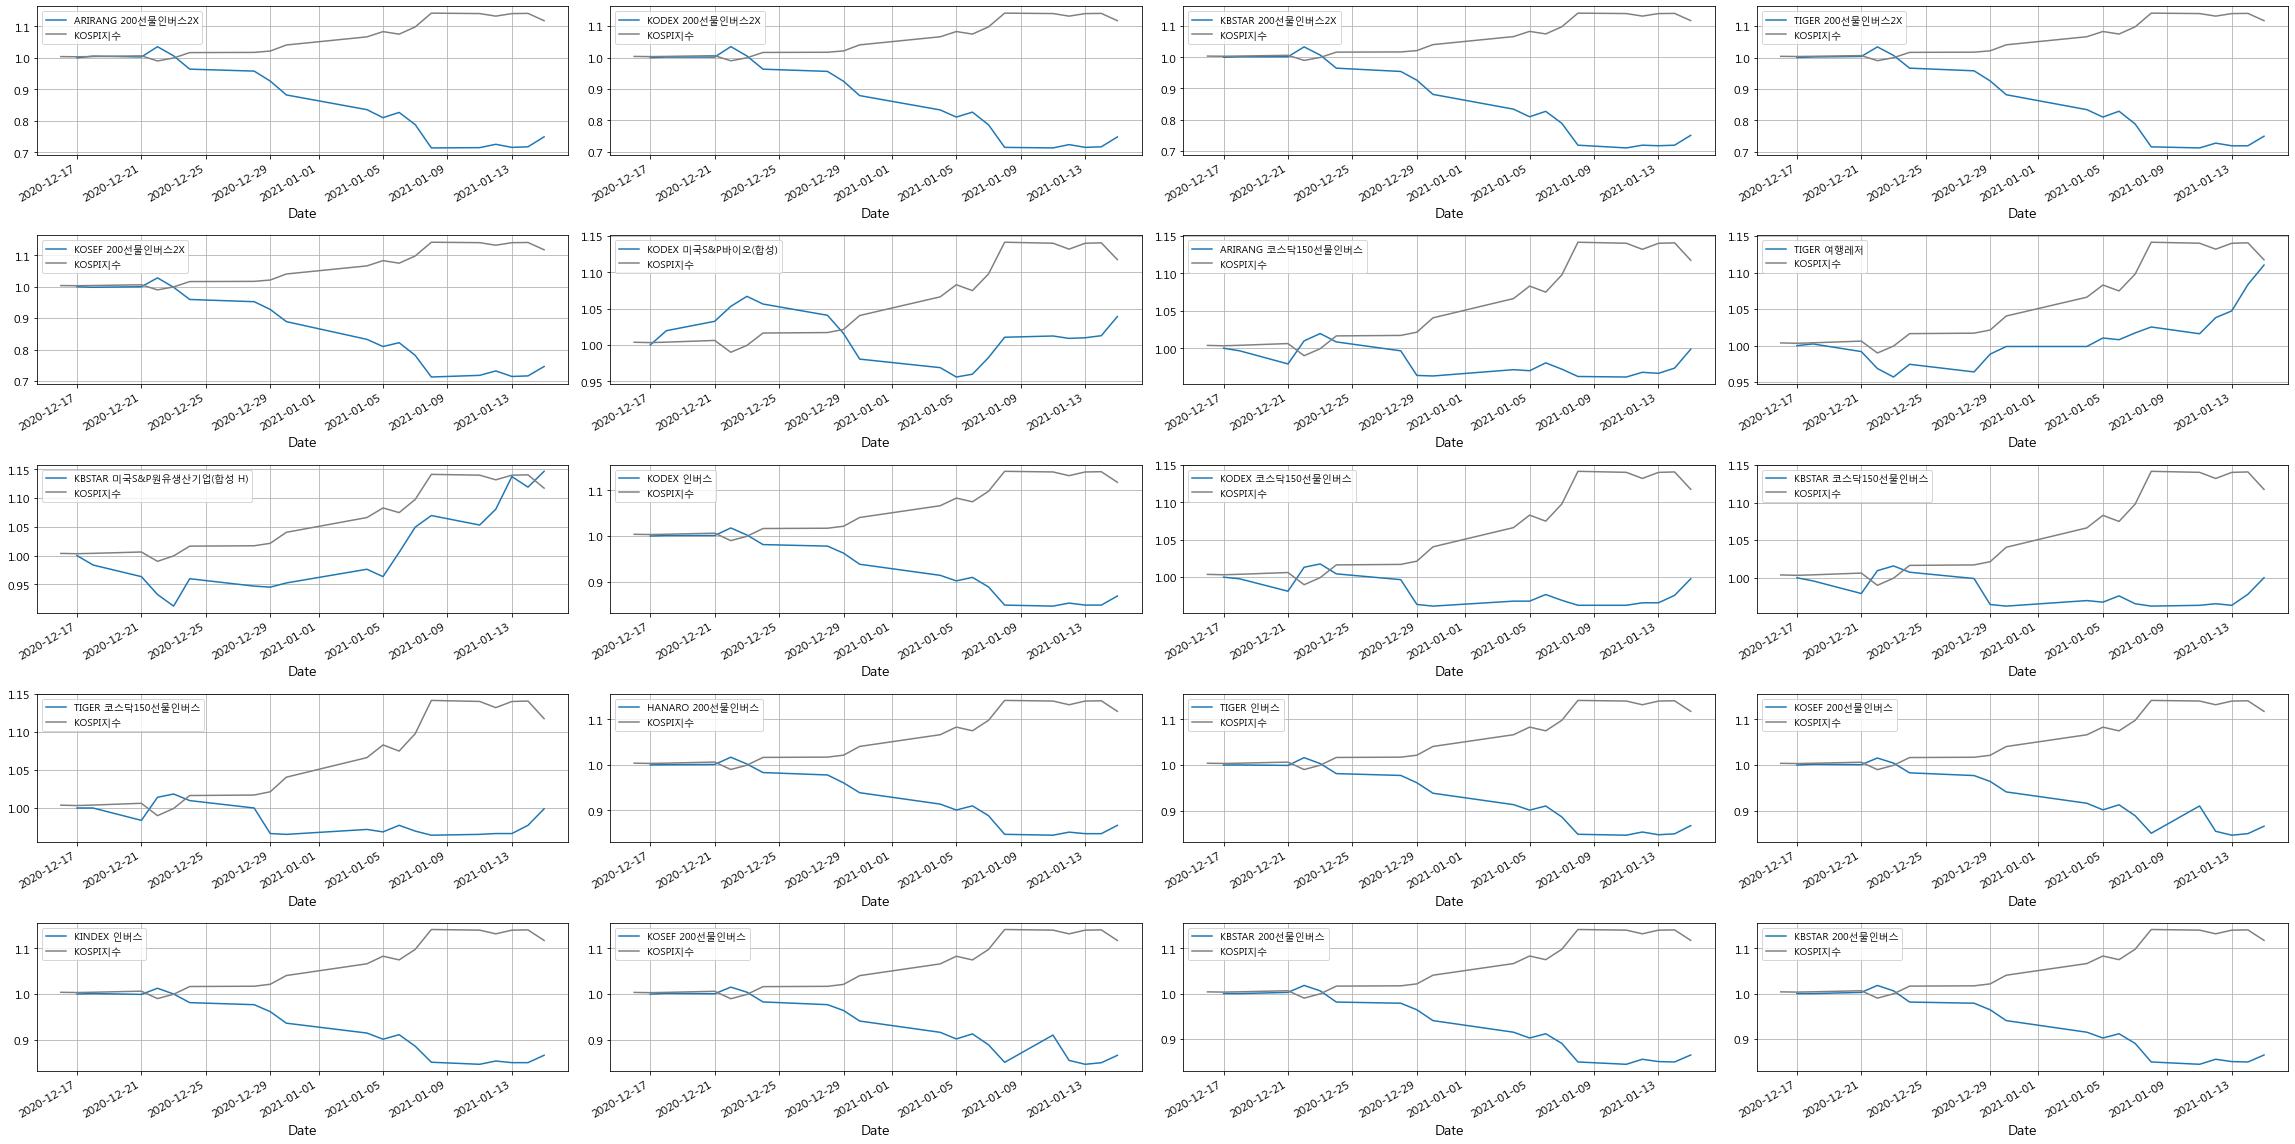

In [45]:
li = [code for code in df.sort_values('일수익율',ascending=False)[:20].코드]
price_plot_s(li,30,5,4,(32,16))# (리스트, 일자,행,열,차트크기)

from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"Daily_Top20ETF_{file_name}")

#### 관심종목 30일 차트 조회

In [46]:
# 종목명 확인하기
print(df1.유형.unique())
print()
관심종목 = input('유형입력')

print()
print(f'해당종목 총 {len(df1[df1.유형.str.contains(관심종목)].종목명)}개')
df1[df1.유형.str.contains(관심종목)].종목명

['시장지수/코스피200' '채권/단기자금' '시장지수/MSCI Korea Index' '그룹주/삼성' '채권/회사채권'
 '테마/기타' '테마/우량주' '해외지수/해외지수' '섹터/IT' '시장지수/코스닥' '상품/원유' '스타일/스타일' '상품/금속'
 '채권/국공채권' '섹터/금융' '섹터/경기소비재' '섹터/의료' '테마/SRI' '시장지수/KRX300' '통화/미국달러'
 '기타/기타' '그룹주/현대차' '상품/농산물' '섹터/산업재' '섹터/소재' '투자전략/투자전략' '시장지수/코스피50'
 '섹터/필수소비재' '그룹주/LG' '시장지수/코스피100' '시장지수/KRX100' '그룹주/기타' '통화/기타통화'
 '섹터/통신서비스']



유형입력 우량주



해당종목 총 7개


15         TIGER TOP10
201       KODEX KTOP30
203       TIGER KTOP30
227          KOSEF 블루칩
277         TIGER 우량가치
310    KODEX FnKorea50
364        KBSTAR 우량업종
Name: 종목명, dtype: object

그림 저장: 상품_21Jan15


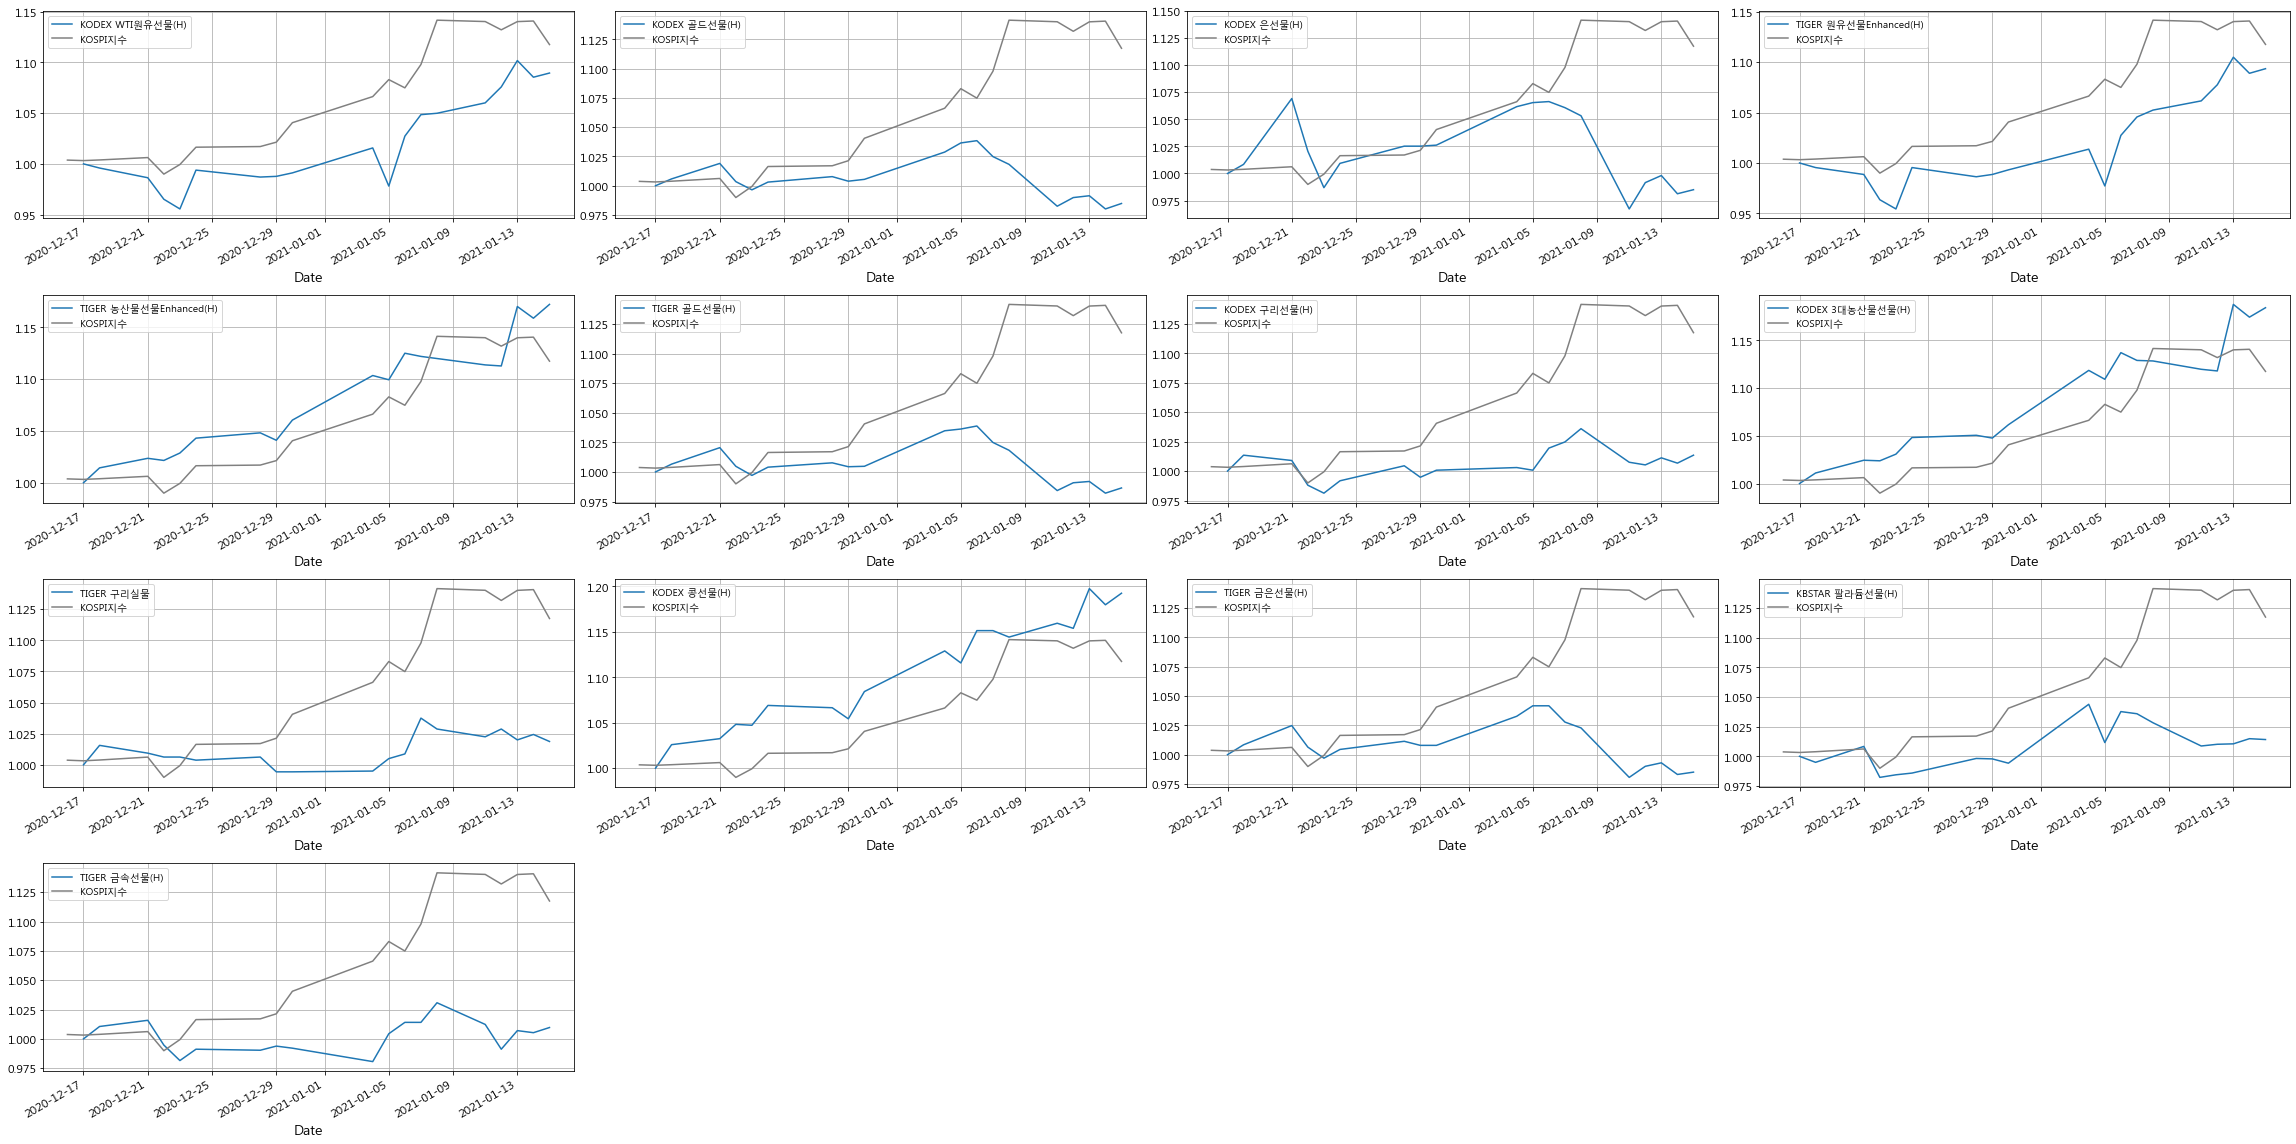

In [47]:
관심종목 = '상품'
li= [code for code in df1[df1.유형.str.contains(관심종목)].코드]
price_plot_s(li,30,4,4,(32,16))

from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"{관심종목}_{file_name}")

### 5. 종목 별 가격 및 구성조회

#### 관심 종목 corr구하기 (kospi 비교)

In [48]:
# li = [code for code in df1[df1.유형.str.contains('상품')].코드]
df = price_codes(li,365)[1]
df.corr()

,KODEX WTI원유선물(H),KODEX 골드선물(H),KODEX 은선물(H),TIGER 원유선물Enhanced(H),TIGER 농산물선물Enhanced(H),TIGER 골드선물(H),KODEX 구리선물(H),KODEX 3대농산물선물(H),TIGER 구리실물,KODEX 콩선물(H),TIGER 금은선물(H),KBSTAR 팔라듐선물(H),TIGER 금속선물(H),KOSPI,USD/KRW
KODEX WTI원유선물(H),1.000000,-0.615099,-0.246222,0.959512,0.251268,-0.623710,-0.119809,0.194625,-0.197750,-0.072035,-0.543404,0.485982,-0.021505,-0.105971,0.057352
KODEX 골드선물(H),-0.615099,1.000000,0.847676,-0.435830,0.077392,0.999771,0.572635,0.072997,0.671549,0.316464,0.991856,0.160603,0.498455,0.551927,-0.412954
KODEX 은선물(H),-0.246222,0.847676,1.000000,-0.032132,0.452166,0.841869,0.819701,0.427165,0.869189,0.592337,0.903872,0.465121,0.802317,0.801956,-0.680298
TIGER 원유선물Enhanced(H),0.959512,-0.435830,-0.032132,1.000000,0.346443,-0.445760,0.093989,0.281313,0.034491,0.058517,-0.351062,0.568030,0.178385,0.119247,-0.105317
TIGER 농산물선물Enhanced(H),0.251268,0.077392,0.452166,0.346443,1.000000,0.069937,0.756414,0.994292,0.621995,0.934959,0.156449,0.606830,0.801403,0.760904,-0.860811
TIGER 골드선물(H),-0.623710,0.999771,0.841869,-0.445760,0.069937,1.000000,0.565775,0.066386,0.665396,0.311347,0.990427,0.150610,0.490136,0.546310,-0.405893
KODEX 구리선물(H),-0.119809,0.572635,0.819701,0.093989,0.756414,0.565775,1.000000,0.744690,0.973404,0.868150,0.638393,0.473784,0.985505,0.958412,-0.925883
KODEX 3대농산물선물(H),0.194625,0.072997,0.427165,0.281313,0.994292,0.066386,0.744690,1.000000,0.609746,0.945489,0.146428,0.556691,0.783428,0.745976,-0.851056
TIGER 구리실물,-0.197750,0.671549,0.869189,0.034491,0.621995,0.665396,0.973404,0.609746,1.000000,0.769012,0.730664,0.406517,0.946027,0.930597,-0.829952
KODEX 콩선물(H),-0.072035,0.316464,0.592337,0.058517,0.934959,0.311347,0.868150,0.945489,0.769012,1.000000,0.378302,0.463756,0.877254,0.869116,-0.925171


In [55]:
df = price_texts('None','골드',20)[0]
df.tail(5)

해당종목은 ['KODEX 골드선물(H)', 'KINDEX 골드선물 레버리지(합성 H)', 'TIGER 골드선물(H)', 'KODEX 골드선물인버스(H)']입니다.


,KODEX 골드선물(H),KINDEX 골드선물 레버리지(합성 H),TIGER 골드선물(H),KODEX 골드선물인버스(H)
Date,,,,
2021-01-11,12630,18570,13450,7130
2021-01-12,12725,18755,13540,7075
2021-01-13,12745,18820,13555,7015
2021-01-14,12600,18430,13420,7085
2021-01-15,12660,18530,13480,7080


In [56]:
df.corr()

,KODEX 골드선물(H),KINDEX 골드선물 레버리지(합성 H),TIGER 골드선물(H),KODEX 골드선물인버스(H)
KODEX 골드선물(H),1.000000,0.997815,0.996555,-0.988730
KINDEX 골드선물 레버리지(합성 H),0.997815,1.000000,0.994072,-0.984185
TIGER 골드선물(H),0.996555,0.994072,1.000000,-0.986184
KODEX 골드선물인버스(H),-0.988730,-0.984185,-0.986184,1.000000


In [69]:
# 3개월 수익율 상위 10종목
li = [code for code in df1.sort_values('3개월수익율',ascending=False)[:10].코드]
df = price_codes(li,365)[1]
df.corr()

,TIGER KRX2차전지K-뉴딜,KODEX 2차전지산업,TIGER 2차전지테마,KODEX 200IT TR,KBSTAR 200IT,TIGER 200 IT,KBSTAR 미국S&P원유생산기업(합성 H),TIGER 현대차그룹+펀더멘털,KODEX 자동차,TIGER 200 에너지화학,KOSPI,USD/KRW
TIGER KRX2차전지K-뉴딜,1.000000,0.996614,0.993603,0.984551,0.984343,0.984708,0.907188,0.976801,0.977387,0.994169,0.980946,-0.742387
KODEX 2차전지산업,0.996614,1.000000,0.996991,0.991181,0.990890,0.991142,0.904764,0.976018,0.976696,0.986464,0.982473,-0.727813
TIGER 2차전지테마,0.993603,0.996991,1.000000,0.987459,0.987449,0.987504,0.902283,0.963390,0.966861,0.982872,0.981131,-0.726017
KODEX 200IT TR,0.984551,0.991181,0.987459,1.000000,0.999855,0.999874,0.900192,0.970914,0.972986,0.974351,0.983959,-0.736085
KBSTAR 200IT,0.984343,0.990890,0.987449,0.999855,1.000000,0.999900,0.898776,0.970527,0.972455,0.974207,0.983713,-0.736150
TIGER 200 IT,0.984708,0.991142,0.987504,0.999874,0.999900,1.000000,0.900830,0.971464,0.973456,0.974620,0.984441,-0.737633
KBSTAR 미국S&P원유생산기업(합성 H),0.907188,0.904764,0.902283,0.900192,0.898776,0.900830,1.000000,0.905773,0.910081,0.919849,0.950554,-0.831266
TIGER 현대차그룹+펀더멘털,0.976801,0.976018,0.963390,0.970914,0.970527,0.971464,0.905773,1.000000,0.995909,0.974076,0.972448,-0.742247
KODEX 자동차,0.977387,0.976696,0.966861,0.972986,0.972455,0.973456,0.910081,0.995909,1.000000,0.975488,0.975715,-0.735927
TIGER 200 에너지화학,0.994169,0.986464,0.982872,0.974351,0.974207,0.974620,0.919849,0.974076,0.975488,1.000000,0.980103,-0.764241


In [70]:
# 3개월 수익율 하위 10종목
li = [code for code in df1.sort_values('3개월수익율',ascending=True)[:10].코드]
df = price_codes(li,365)[1]
df.corr()

,KODEX 코스닥150롱코스피200숏선물,TIGER 의료기기,TIGER 미국채10년선물,KODEX 미국채울트라30년선물(H),KODEX 미국채10년선물,KBSTAR 미국장기국채선물(H),ARIRANG 미국장기우량회사채,KOSEF 미국달러선물,TIGER 미국달러단기채권액티브,KBSTAR 미국고정배당우선증권ICE TR,KOSPI,USD/KRW
KODEX 코스닥150롱코스피200숏선물,1.000000,0.468053,0.848797,0.806266,0.854193,0.859317,0.869088,0.823502,0.827228,0.849052,-0.698971,0.824896
TIGER 의료기기,0.468053,1.000000,0.304026,0.249875,0.299521,0.286992,0.227508,0.275033,0.276497,0.297910,-0.204774,0.268839
TIGER 미국채10년선물,0.848797,0.304026,1.000000,0.835960,0.998939,0.904043,0.937410,0.995955,0.996455,0.928137,-0.787717,0.992809
KODEX 미국채울트라30년선물(H),0.806266,0.249875,0.835960,1.000000,0.839937,0.978293,0.912918,0.792123,0.796016,0.785288,-0.786362,0.792106
KODEX 미국채10년선물,0.854193,0.299521,0.998939,0.839937,1.000000,0.905980,0.940699,0.994588,0.995200,0.930133,-0.781604,0.991783
KBSTAR 미국장기국채선물(H),0.859317,0.286992,0.904043,0.978293,0.905980,1.000000,0.940563,0.869431,0.872164,0.849651,-0.834449,0.868549
ARIRANG 미국장기우량회사채,0.869088,0.227508,0.937410,0.912918,0.940699,0.940563,1.000000,0.919367,0.923894,0.926223,-0.707353,0.921353
KOSEF 미국달러선물,0.823502,0.275033,0.995955,0.792123,0.994588,0.869431,0.919367,1.000000,0.999507,0.923541,-0.767622,0.995954
TIGER 미국달러단기채권액티브,0.827228,0.276497,0.996455,0.796016,0.995200,0.872164,0.923894,0.999507,1.000000,0.927168,-0.763857,0.995968
KBSTAR 미국고정배당우선증권ICE TR,0.849052,0.297910,0.928137,0.785288,0.930133,0.849651,0.926223,0.923541,0.927168,1.000000,-0.665186,0.923092


In [195]:
li = [code for code in df.코드[:20]]
df_t = price_codes(li,30)
df_t[1].tail(5)

,KODEX 200,TIGER 200,KODEX 단기채권,TIGER MSCI Korea TR,KODEX 200선물인버스2X,KODEX MSCI Korea TR,KODEX 삼성그룹,KODEX 레버리지,KODEX 200TR,KODEX 종합채권(AA-이상)액티브,KBSTAR 200,KODEX 코스닥150 레버리지,KODEX 인버스,KODEX 단기채권PLUS,ARIRANG 200,TIGER 단기통안채,KINDEX 200,KOSEF 200,HANARO 200,TIGER 미국나스닥100
Date,,,,,,,,,,,,,,,,,,,,
2021-01-06,1.098975,1.098045,1.000390,1.093915,0.822300,1.093854,1.114458,1.204087,1.104114,0.998003,1.099407,1.067348,0.906593,1.000583,1.098941,1.00035,1.098724,1.099690,1.098087,1.015955
2021-01-07,1.124595,1.123129,1.000536,1.116402,0.782230,1.116694,1.139650,1.262740,1.125105,0.998638,1.125135,1.080753,0.885714,1.000632,1.124413,1.00035,1.125991,1.125286,1.124899,1.021971
2021-01-08,1.174353,1.173432,1.000536,1.172288,0.710801,1.173588,1.190033,1.377885,1.176742,0.998275,1.175647,1.093840,0.846154,1.000681,1.175627,1.00040,1.175688,1.175401,1.173808,1.045293
2021-01-11,1.177319,1.176129,1.000585,1.178902,0.709059,1.183140,1.192771,1.386058,1.178421,0.999682,1.178206,1.097670,0.843956,1.000632,1.177236,1.00045,1.179987,1.179577,1.176233,1.056665
2021-01-12,1.156149,1.155765,1.000634,1.160053,0.735192,1.155731,1.168675,1.331490,1.156591,0.998911,1.156519,1.079796,0.860440,1.000632,1.155919,1.00040,1.157690,1.157483,1.155888,1.049166


#### 구성종목 확인하기

In [72]:
comp(['228810','228800'])

,TIGER 미디어컨텐츠,구성비중1,등락률1,TIGER 여행레저,구성비중2,등락률2
1,CJ CGV,12.10%,-2.07%,파라다이스,10.13%,+0.90%
2,스튜디오드래곤,11.05%,-3.20%,강원랜드,9.81%,-1.75%
3,CJ ENM,10.38%,-2.76%,하나투어,9.70%,+1.41%
4,JYP Ent.,9.13%,-2.16%,호텔신라,9.23%,0.00%
5,제이콘텐트리,9.05%,-2.63%,한진칼,8.16%,-1.63%
9,에스엠,8.27%,-3.24%,GKL,8.08%,-2.70%
10,와이지엔터테인먼트,8.25%,-3.19%,롯데관광개발,7.77%,+2.57%
11,초록뱀,6.23%,-2.18%,아난티,7.58%,-1.47%
12,지니뮤직,4.48%,+14.26%,모두투어,5.55%,0.00%
13,키이스트,4.13%,-7.14%,진에어,4.52%,-2.54%


In [8]:
# 종목명 확인하기
print(df1.유형.unique())
print()
관심종목 = input('유형입력')

print()
print(f'해당종목 총 {len(df1[df1.유형.str.contains(관심종목)].종목명)}개')
df1[df1.유형.str.contains(관심종목)].종목명

['시장지수/코스피200' '채권/단기자금' '시장지수/MSCI Korea Index' '그룹주/삼성' '채권/회사채권'
 '테마/기타' '테마/우량주' '해외지수/해외지수' '섹터/IT' '시장지수/코스닥' '상품/원유' '스타일/스타일' '상품/금속'
 '채권/국공채권' '섹터/금융' '섹터/경기소비재' '섹터/의료' '테마/SRI' '시장지수/KRX300' '통화/미국달러'
 '기타/기타' '그룹주/현대차' '상품/농산물' '섹터/산업재' '섹터/소재' '투자전략/투자전략' '시장지수/코스피50'
 '섹터/필수소비재' '그룹주/LG' '시장지수/코스피100' '시장지수/KRX100' '그룹주/기타' '통화/기타통화'
 '섹터/통신서비스']



유형입력 해외



해당종목 총 73개


17          TIGER 미국나스닥100
29     KODEX 선진국MSCI World
32         TIGER 차이나CSI300
33      KODEX 미국FANG플러스(H)
37      KINDEX 베트남VN30(합성)
              ...         
337     KODEX MSCI EM선물(H)
340      KODEX 멀티에셋하이인컴(H)
341     KBSTAR 차이나HSCEI(H)
346    TIGER S&P글로벌인프라(합성)
363      ARIRANG S&P글로벌인프라
Name: 종목명, Length: 73, dtype: object

In [43]:
# 구성종목 확인함수
import requests
import FinanceDataReader as fdr
import pandas as pd

codes = ['133690','360750']
df_l = []
for idx, code in enumerate(codes):
    name = df[df.코드 == code].종목명.values[0]
    url = f'https://finance.naver.com/item/main.nhn?code={code}'
    html = requests.get(url).text
    dfs = pd.read_html(html)
    dfs_c = dfs[3]
    if len(dfs_c)>10 :
        dfs_c = dfs_c.dropna()[['구성종목(구성자산)','주식수(계약수)']]
        dfs_c.columns = [name,f'주식수{idx+1}']
        df_l.append(dfs_c)
df_m = pd.concat(df_l,axis=1)


In [47]:
comp_e(['133690','360750'])

,TIGER 미국나스닥100,주식수1,TIGER 미국S&P500,주식수2
1,APPLE INC,5264.0,APPLE INC,471.0
2,MICROSOFT CORP,2341.0,GENERAL ELECTRIC CO,258.0
3,COMCAST CORP-CLASS A,2151.0,BANK OF AMERICA CORP,225.0
4,SIRIUS XM HOLDINGS INC,2002.0,MICROSOFT CORP,223.0
5,CISCO SYSTEMS INC,1991.0,AT&T INC,210.0
9,INTEL CORP,1931.0,PFIZER INC,164.0
10,FACEBOOK INC-CLASS A,744.0,COMCAST CORP-CLASS A,135.0
11,MONDELEZ INTERNATIONAL INC-A,674.0,CISCO SYSTEMS INC,125.0
12,KEURIG DR PEPPER INC,663.0,EXXON MOBIL CORP,125.0
13,PEPSICO INC,651.0,VERIZON COMMUNICATIONS INC,122.0


In [49]:
comp_e([code for code in df1[df1.종목명.str.contains('미국')].코드])


,TIGER 미국나스닥100,주식수1,KODEX 미국FANG플러스(H),주식수2,TIGER 미국S&P500선물(H),주식수3,TIGER 미국S&P500,주식수4,KINDEX 미국S&P500,주식수5,...,KINDEX 미국WideMoat가치주,주식수23,KODEX 200미국채혼합,주식수25,KBSTAR KRX300미국달러선물혼합,주식수27,KODEX 다우존스미국리츠(H),주식수29,KBSTAR 미국고정배당우선증권ICE TR,주식수30
1,APPLE INC,5264.0,TWITTER INC,1989.0,ISHARES CORE S&P 500 ETF,67,APPLE INC,471.0,APPLE Inc,455.0,...,NaN,NaN,KODEX 200,2627.0,KBSTAR KRX300,3363,ANNALY CAPITAL MANAGEMENT IN,1231.0,INVESCO PREFERRED ETF,5929.0
2,MICROSOFT CORP,2341.0,APPLE Inc,877.0,SPDR S&P 500 ETF TRUST,58,GENERAL ELECTRIC CO,258.0,GENERAL ELECTRIC CO,249.0,...,NaN,NaN,삼성전자,1144.0,KOSEF 미국달러선물,643,WEYERHAEUSER CO,657.0,BAC 6 PERP,230.0
3,COMCAST CORP-CLASS A,2151.0,BAIDU INC,576.0,S&P500 EMINI FUT MAR 2021,5,BANK OF AMERICA CORP,225.0,BANK OF AMERICA CORP,217.0,...,NaN,NaN,SK하이닉스,136.0,NaN,NaN,PROLOGIS INC,651.0,WFC 4 3/4 PERP,206.0
4,SIRIUS XM HOLDINGS INC,2002.0,ALIBABA GROUP HOLDING-SP ADR,427.0,미달러선물21년01월물,-10,MICROSOFT CORP,223.0,MICROSOFT,215.0,...,NaN,NaN,LG화학,11.0,NaN,NaN,HOST HOTELS & RESORTS INC,621.0,JPM 6 PERP,189.0
5,CISCO SYSTEMS INC,1991.0,FACEBOOK,402.0,원화현금,-,AT&T INC,210.0,AT&T INC,203.0,...,NaN,NaN,NAVER,31.0,NaN,NaN,INVITATION HOMES,493.0,T 4 3/4 PERP,179.0
9,INTEL CORP,1931.0,NVIDIA Corp,209.0,설정현금액,-,PFIZER INC,164.0,PFIZER INC,158.0,...,NaN,NaN,삼성SDI,13.0,NaN,NaN,HEALTHPEAK PROPERTIES INC,474.0,WFC 5.85 PERP,177.0
10,FACEBOOK INC-CLASS A,744.0,NETFLIX,207.0,NaN,NaN,COMCAST CORP-CLASS A,135.0,COMCAST CORP,130.0,...,NaN,NaN,셀트리온,26.0,NaN,NaN,MEDICAL PROPERTIES TRUST INC,472.0,JPM 5 3/4 PERP,174.0
11,MONDELEZ INTERNATIONAL INC-A,674.0,TESLA MOTORS,159.0,NaN,NaN,CISCO SYSTEMS INC,125.0,CISCO SYSTEMS INC,120.0,...,NaN,NaN,현대차,34.0,NaN,NaN,VICI PROPERTIES INC,472.0,COF 5 PERP,154.0
12,KEURIG DR PEPPER INC,663.0,ALPHABET INC-CL A,64.0,NaN,NaN,EXXON MOBIL CORP,125.0,EXXON MOBIL CORP,120.0,...,NaN,NaN,카카오,15.0,NaN,NaN,AGNC INVESTMENT,460.0,PNC 6 1/8 PERP,154.0
13,PEPSICO INC,651.0,Amazon.com Inc,34.0,NaN,NaN,VERIZON COMMUNICATIONS INC,122.0,VERIZON COMMUNICATIONS INC,118.0,...,NaN,NaN,현대모비스,16.0,NaN,NaN,AMERICAN TOWER CORP,391.0,C 6 7/8 PERP,153.0


In [10]:
comp([code for code in df1[df1.유형.str.contains('경기소비재')].코드])

,KODEX 자동차,구성비중1,등락률1,TIGER 경기방어,구성비중2,등락률2,TIGER 미디어컨텐츠,구성비중3,등락률3,TIGER 여행레저,...,등락률6,KODEX 경기소비재,구성비중7,등락률7,KBSTAR 내수주플러스,구성비중8,등락률8,KBSTAR 200경기소비재,구성비중9,등락률9
1,현대차,21.76%,-4.19%,셀트리온,21.68%,-6.67%,CJ CGV,10.17%,-2.07%,파라다이스,...,-4.19%,LG전자,29.22%,-4.76%,LG전자,10.27%,-4.76%,현대차,20.84%,-4.19%
2,기아차,21.33%,-3.66%,LG생활건강,9.13%,-1.00%,JYP Ent.,9.92%,-2.16%,강원랜드,...,-1.68%,코웨이,8.12%,-1.99%,LG생활건강,10.15%,-1.00%,현대모비스,18.02%,-1.68%
3,현대모비스,17.23%,-1.68%,SK텔레콤,7.95%,-1.57%,에스엠,9.88%,-3.24%,호텔신라,...,-3.66%,에이치엘비,7.77%,-2.34%,SK텔레콤,7.15%,-1.57%,기아차,15.55%,-3.66%
4,한온시스템,12.13%,-3.64%,삼성바이오로직스,7.44%,-1.47%,와이지엔터테인먼트,9.75%,-3.19%,한진칼,...,+0.66%,강원랜드,6.24%,-1.75%,KT&G,6.00%,-0.49%,삼성물산,13.20%,+0.66%
5,한국타이어앤테크놀로,7.60%,-1.23%,KT&G,5.32%,-0.49%,스튜디오드래곤,9.71%,-3.20%,하나투어,...,-3.64%,호텔신라,5.10%,0.00%,한국전력,4.96%,-2.50%,한온시스템,3.99%,-3.64%
9,만도,6.14%,-2.58%,한국전력,4.95%,-2.50%,CJ ENM,9.52%,-2.76%,롯데관광개발,...,-1.99%,휠라홀딩스,4.38%,-2.34%,아모레퍼시픽,4.55%,+3.28%,코웨이,3.61%,-1.99%
10,현대위아,3.09%,-4.92%,아모레퍼시픽,4.25%,+3.28%,빅히트,9.42%,-5.42%,GKL,...,-1.75%,신세계,3.45%,-2.56%,코웨이,2.71%,-1.99%,강원랜드,2.77%,-1.75%
11,세방전지,1.84%,+6.84%,KT,3.25%,-0.21%,제이콘텐트리,6.82%,-2.63%,아난티,...,-1.23%,CJ ENM,3.21%,-2.76%,유한양행,2.45%,-1.93%,한국타이어앤테크놀로지,2.50%,-1.23%
12,금호타이어,1.62%,-0.13%,신풍제약,2.51%,-1.27%,초록뱀,4.78%,-2.18%,모두투어,...,0.00%,롯데쇼핑,2.39%,-2.85%,이마트,2.32%,-1.97%,호텔신라,2.25%,0.00%
13,S&T모티브,1.20%,+1.44%,유한양행,2.50%,-1.93%,지니뮤직,3.91%,+14.26%,진에어,...,-2.58%,현대백화점,2.22%,-1.25%,LG유플러스,2.31%,-0.41%,만도,2.02%,-2.58%


In [25]:
comp([code for code in df2.sort_values('일수익율',ascending=False)[:20].code])

,TIGER 화장품,구성비중5,등락률5,TIGER 베타플러스,구성비중6,등락률6,마이티 코스피100,구성비중11,등락률11,TIGER 은행,...,등락률15,KBSTAR 200에너지화학,구성비중16,등락률16,TIGER 미디어컨텐츠,구성비중18,등락률18,TIGER MSCI KOREA ESG리더스,구성비중20,등락률20
1,아모레G,11.86%,+3.61%,삼성전자,25.88%,-1.21%,삼성전자,33.17%,-1.21%,하나금융지주,...,+2.27%,LG화학,20.22%,+3.74%,CJ CGV,12.04%,+0.53%,SK하이닉스,16.53%,+2.33%
2,아모레퍼시픽,11.85%,+4.19%,SK하이닉스,14.29%,+2.33%,SK하이닉스,6.29%,+2.33%,KB금융,...,+3.17%,SK이노베이션,20.01%,-1.23%,스튜디오드래곤,11.43%,-0.10%,LG화학,10.23%,+3.74%
3,한국콜마,10.83%,+1.37%,삼성SDI,7.88%,+0.67%,LG화학,3.82%,+3.74%,신한지주,...,+2.68%,SK,13.16%,+4.97%,CJ ENM,11.05%,-0.53%,삼성SDI,9.59%,+0.67%
4,LG생활건강,10.45%,+2.12%,현대차,7.56%,-0.96%,셀트리온,3.51%,-0.39%,우리금융지주,...,+1.33%,한화솔루션,7.34%,+2.23%,제이콘텐트리,9.47%,-2.46%,NAVER,8.76%,+3.29%
5,코스맥스,7.96%,+2.78%,현대모비스,4.35%,+1.96%,NAVER,3.35%,+3.29%,기업은행,...,+1.36%,롯데케미칼,6.81%,-1.12%,JYP Ent.,9.34%,+0.54%,KB금융,4.28%,+2.27%
9,콜마비앤에이치,7.62%,+0.60%,기아차,3.62%,+2.85%,삼성SDI,3.29%,+0.67%,BNK금융지주,...,+3.91%,S-Oil,4.25%,+4.26%,와이지엔터테인먼트,8.16%,+3.87%,SK이노베이션,3.74%,-1.23%
10,한국콜마홀딩스,7.02%,+2.10%,KB금융,3.04%,+2.27%,현대차,3.19%,-0.96%,DGB금융지주,...,-0.50%,금호석유,3.84%,+1.25%,에스엠,7.95%,+5.53%,엔씨소프트,3.71%,-1.37%
11,현대바이오랜드,6.69%,0.00%,삼성물산,2.89%,+0.69%,카카오,2.47%,-0.66%,JB금융지주,...,+1.05%,SK케미칼,3.65%,+0.42%,초록뱀,6.23%,+2.24%,LG생활건강,3.49%,+2.12%
12,네오팜,3.99%,+6.08%,신한지주,2.88%,+3.17%,현대모비스,1.87%,+1.96%,NaN,...,-0.57%,SKC,2.70%,-1.19%,키이스트,4.13%,+1.40%,LG전자,3.45%,+1.08%
13,코리아나,3.19%,+3.02%,하나금융지주,2.15%,+2.68%,POSCO,1.66%,+1.99%,NaN,...,+2.30%,OCI,2.61%,+4.37%,위지윅스튜디오,3.51%,+1.82%,신한지주,3.41%,+3.17%


In [ ]:
# 추출 및 수집 : 최초원본 
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import time
# import pandas as pd
# import os

# PROJECT_ROOT_DIR = "./fdr_output"
# CHAPTER_ID = "stock_check"
# SAMPLES_PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
# os.makedirs(SAMPLES_PATH, exist_ok=True)

# def mkfile(file): #파일 경로 생성함수
#     file = os.path.join(SAMPLES_PATH,f'{file}.csv')
#     return file

# etf = mkfile('etf') 

# try:
#     # 홈페이지에 접근하여 ETF 항목 클릭
#     driver=webdriver.Chrome("./chromedriver.exe")
#     driver.get("http://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/etf/BIP_CNTS06025V.xml&menuNo=174")
#     time.sleep(5)
#     a=driver.find_element_by_xpath('//*[@id="image10"]')
#     a.click()
#     path = 'ETF.txt'
#     if os.path.exists(path):os.remove(path)

#     # 페이지 넘김
#     i=1

#     while True: 
#         time.sleep(1)
#         a=driver.find_element_by_xpath('//*[@id="pageList1_page_%d"]'%i)
#         a.click()

#         time.sleep(2)
#         html=driver.page_source
#         soup=BeautifulSoup(html,"html.parser")

#         f = open("ETF.txt", 'a')
#         for anchors in soup.select("#grid1_body_tbody")[0]:
#             for anchor in anchors.select("td"):
#                 data = anchor.get_text()+'\n'
#                 f.write(data)
#         f.close()
#         i+=1
    
    
# # 더이상 읽을 테이지 없을 때, 
# except:
#     # 리스트화 하여 항목을 담아주고, 딕셔너리로 변환하여, 판다스 DF만들기
#     df = pd.DataFrame()
#     cols = ['종목명','코드','유형','순자산','종가','거래량','수익율','총보수','운용사']
#     종목명 = [] #1;
#     코드 = [] #2
#     유형 = [] #3
#     순자산 =[] #4
#     종가 =[] #5
#     거래량 = [] #6
#     수익율 = [] #9
#     총보수 = [] #15
#     운용사 = [] #16
#     with open('ETF.txt','r') as f:
#         data = f.readlines()
#         for i, j in enumerate(data):
#             if i % 17 == 1:종목명.append(j.replace('\n',''))
#             elif i % 17 ==2:코드.append(j.replace('\n',''))
#             elif i % 17 ==3:유형.append(j.replace('\n',''))
#             elif i % 17 ==4:순자산.append(j.replace('\n',''))
#             elif i % 17 ==5:종가.append(j.replace('\n',''))
#             elif i % 17 ==6:거래량.append(j.replace('\n',''))
#             elif i % 17 ==9:수익율.append(j.replace('\n',''))
#             elif i % 17 ==15:총보수.append(j.replace('\n',''))
#             elif i % 17 ==16:운용사.append(j.replace('\n',''))      
#     data = {'종목명':종목명,'코드':코드,'유형':유형,'순자산':순자산,'종가':종가,'거래량':거래량,'수익율':수익율,'총보수':총보수,'운용사':운용사}
#     df = pd.DataFrame(data, columns = cols)

#     # 보수, 수익율 없는 상품 제거하기
#     df = df.drop(df[df['총보수']==''].index)
#     df = df.drop(df[df['수익율']==''].index)

#     # 전처리 : 계산 가능한 값으로 변환하기
#     df['거래량']=df['거래량'].apply(lambda x: x.replace(',',''))
#     df['종가']=df['종가'].apply(lambda x: x.replace(',',''))
#     df['순자산']=df['순자산'].apply(lambda x: x.replace(',',''))
#     df['거래량']=df['거래량'].astype(int)
#     df['종가']=df['종가'].astype(int)
#     df['순자산']=df['순자산'].astype(int)
#     df['수익율']=df['수익율'].astype(float)
#     df['총보수']=df['총보수'].astype(float)

#     # 전처리 : 5개 자리인 코드를 6개자리로 변환
#     df['코드'] = df['코드'].astype(str)
#     code = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
#     df.loc[code,'코드'] = '0'+ df.loc[code,'코드'].astype(str)

#     df.to_csv(etf,sep=',',encoding='euc-kr')
    
#     print('연산이 끝났습니다')
#     print(f'추출한 총 ETF의 수 {len(df)}개')